# COGS 109 Final Project

### Chen Meng, c5meng@ucsd.edu
### [Your name] 

In [28]:
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [29]:
header = open("header.txt", "r").read()
rawLines = [l for l in header.split('--') if len(l) != 0]
colTitles = [l.split(':')[0].strip() for l in rawLines]
print("Total columns:", len(colTitles))

# Data source: https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime+Unnormalized
data = pd.read_csv("CommViolPredUnnormalizedData.txt", names=colTitles, na_values="?")
data = data[["communityname","state",
             "racepctblack","racePctWhite","racePctAsian","racePctHisp",
             "whitePerCap","blackPerCap","AsianPerCap","HispPerCap",
             "ViolentCrimesPerPop"]]
data = data.dropna(0) # drop rows with invalid(nan) values
data

Total columns: 147


,communityname,state,racepctblack,racePctWhite,racePctAsian,racePctHisp,whitePerCap,blackPerCap,AsianPerCap,HispPerCap,ViolentCrimesPerPop
0,BerkeleyHeightstownship,NJ,1.37,91.78,6.50,1.88,30233,13600,27101,22838,41.02
1,Marpletownship,PA,0.80,95.57,3.44,0.85,20191,18137,20074,12222,127.56
2,Tigardcity,OR,0.74,94.33,3.43,2.35,17103,16644,15528,8405,218.59
3,Gloversvillecity,NY,1.70,97.35,0.50,0.70,10909,9984,3541,4391,306.64
5,Springfieldcity,MO,2.51,95.65,0.90,0.95,12029,7382,10753,8104,442.95
...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,6.87,61.68,15.23,29.86,13041,8344,3399,6644,545.75
2211,Pinevillecity,LA,21.18,76.65,1.52,1.29,11353,5768,1718,4883,124.10
2212,Yucaipacity,CA,0.52,92.62,0.98,11.00,14416,13630,17313,9398,353.83
2213,Beevillecity,TX,3.37,69.91,0.90,62.11,9555,6437,171,5338,691.17


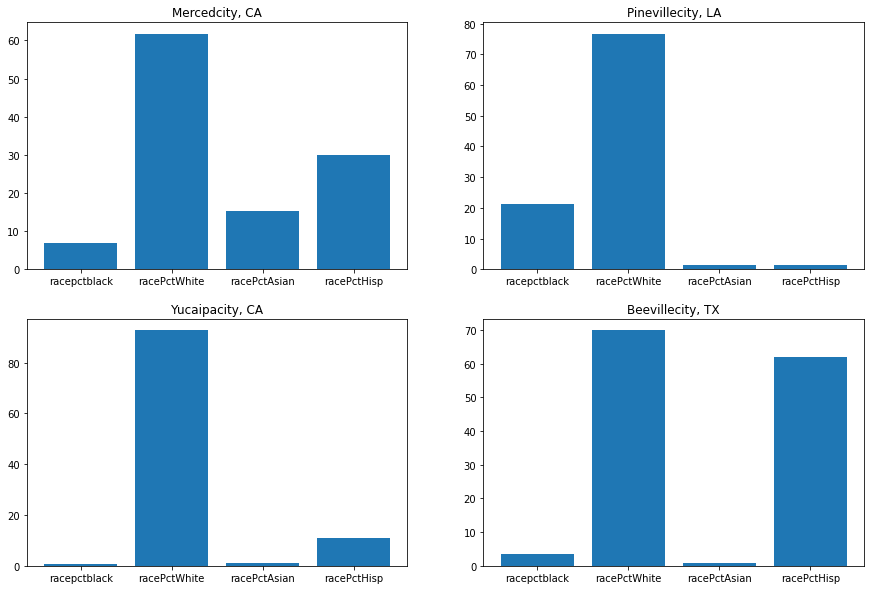

In [18]:
variables = ["racepctblack","racePctWhite","racePctAsian","racePctHisp"]
fig, axs = plt.subplots(2,2,figsize=(15,10))
# Show ethnical distribution of 4 chosen communites(row 2210 - 2213)
for i in range(4):
    axs[i//2][i%2].bar(variables, data.loc[2210+i,variables])
    axs[i//2][i%2].set_title(str(data.loc[2210+i,"communityname"]) + ", " + str(data.loc[2210+i,"state"]))

In [27]:
X = data[["racepctblack","racePctWhite","racePctAsian","racePctHisp"]].to_numpy()
Y = data["ViolentCrimesPerPop"].to_numpy()
print(X.shape)
print(Y.shape)

n = len(Y)
ones = np.ones(n, dtype=int).reshape(n,1)
A = np.append(ones, X, axis=1) 
print(A.shape)
w = np.linalg.lstsq(A, Y, rcond=None)[0] #y=w0+w1*black+w2*white+w3*asian+w4*hisp
print(w)

(1994, 4)
(1994,)
(1994, 5)
[1565.92376594   14.83502512  -13.66951569   -9.37415894    5.79160023]
